# Importing Dataset and Importing basic Libraries

In [ ]:
import pandas as pd

# Load data from the local Colab path
data = pd.read_csv("/content/Loan_ml.csv")


# Display basic information about the dataset
data_info = {
    "head": data.head(),
    "info": data.info(),
    "missing_values": data.isnull().sum(),
    "duplicated_rows": data.duplicated().sum(),
    "shape": data.shape,
}
data_info


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   LoanID          255347 non-null  object 
 1   Age             255347 non-null  int64  
 2   Income          255347 non-null  int64  
 3   LoanAmount      255347 non-null  int64  
 4   CreditScore     255347 non-null  int64  
 5   MonthsEmployed  255347 non-null  int64  
 6   NumCreditLines  255347 non-null  int64  
 7   InterestRate    255347 non-null  float64
 8   LoanTerm        255347 non-null  int64  
 9   DTIRatio        255347 non-null  float64
 10  Education       255347 non-null  object 
 11  EmploymentType  255347 non-null  object 
 12  MaritalStatus   255347 non-null  object 
 13  HasMortgage     255347 non-null  object 
 14  HasDependents   255347 non-null  object 
 15  LoanPurpose     255347 non-null  object 
 16  HasCoSigner     255347 non-null  object 
 17  Default   

{'head':        LoanID  Age  Income  LoanAmount  CreditScore  MonthsEmployed  \
 0  I38PQUQS96   56   85994       50587          520              80   
 1  HPSK72WA7R   69   50432      124440          458              15   
 2  C1OZ6DPJ8Y   46   84208      129188          451              26   
 3  V2KKSFM3UN   32   31713       44799          743               0   
 4  EY08JDHTZP   60   20437        9139          633               8   
 
    NumCreditLines  InterestRate  LoanTerm  DTIRatio    Education  \
 0               4         15.23        36      0.44   Bachelor's   
 1               1          4.81        60      0.68     Master's   
 2               3         21.17        24      0.31     Master's   
 3               3          7.07        24      0.23  High School   
 4               4          6.51        48      0.73   Bachelor's   
 
   EmploymentType MaritalStatus HasMortgage HasDependents LoanPurpose  \
 0      Full-time      Divorced         Yes           Yes       Other

# Data Preprocessing

In [ ]:
from sklearn.preprocessing import LabelEncoder
data.loc[(data['Age'] == 19) & (data['LoanPurpose'] != 'Education'), 'Default'] = 0
print(data.head(25))
# Encode categorical features
categorical_columns = data.select_dtypes(include=['object']).columns
label_encoders = {col: LabelEncoder() for col in categorical_columns}

for col in categorical_columns:
    data[col] = label_encoders[col].fit_transform(data[col])

# Preview the dataset after encoding
data.head()
data.info()
data.describe()

        LoanID  Age  Income  LoanAmount  CreditScore  MonthsEmployed  \
0   I38PQUQS96   56   85994       50587          520              80   
1   HPSK72WA7R   69   50432      124440          458              15   
2   C1OZ6DPJ8Y   46   84208      129188          451              26   
3   V2KKSFM3UN   32   31713       44799          743               0   
4   EY08JDHTZP   60   20437        9139          633               8   
5   A9S62RQ7US   25   90298       90448          720              18   
6   H8GXPAOS71   38  111188      177025          429              80   
7   0HGZQKJ36W   56  126802      155511          531              67   
8   1R0N3LGNRJ   36   42053       92357          827              83   
9   CM9L1GTT2P   40  132784      228510          480             114   
10  IA35XVH6ZO   28  140466      163781          652              94   
11  Y8UETC3LSG   28  149227      139759          375              56   
12  RM6QSRHIYP   41   23265       63527          829            

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
count,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000
mean,127673.000000,43.498306,82499.304597,127578.865512,574.264346,59.541976,2.501036,13.492773,36.025894,0.500212,1.494421,1.500096,0.999918,0.500014,0.500268,2.000501,0.500108,0.112662
std,73712.473931,14.990258,38963.013729,70840.706142,158.903867,34.643376,1.117018,6.636443,16.969330,0.230917,1.118826,1.117358,0.816051,0.500001,0.500001,1.412723,0.500001,0.316180
min,0.000000,18.000000,15000.000000,5000.000000,300.000000,0.000000,1.000000,2.000000,12.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,63836.500000,31.000000,48825.500000,66156.000000,437.000000,30.000000,2.000000,7.770000,24.000000,0.300000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,127673.000000,43.000000,82466.000000,127556.000000,574.000000,60.000000,2.000000,13.460000,36.000000,0.500000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,0.000000
75%,191509.500000,56.000000,116219.000000,188985.000000,712.000000,90.000000,3.000000,19.250000,48.000000,0.700000,2.000000,2.000000,2.000000,1.000000,1.000000,3.000000,1.000000,0.000000
max,255346.000000,69.000000,149999.000000,249999.000000,849.000000,119.000000,4.000000,25.000000,60.000000,0.900000,3.000000,3.000000,2.000000,1.000000,1.000000,4.000000,1.000000,1.000000


# Importing Libraries and Data visualisation

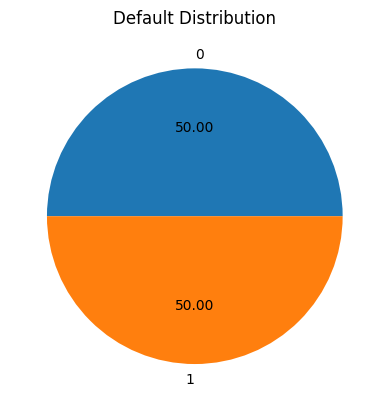

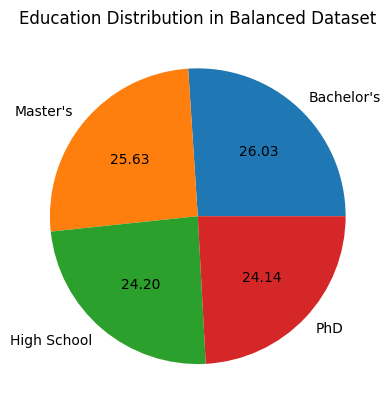

Default Counts (Before Balancing):
 Default
0    225694
1     29653
Name: count, dtype: int64

Balanced Dataset Info:
<class 'pandas.core.frame.DataFrame'>
Index: 59306 entries, 0 to 255343
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   LoanID          59306 non-null  object 
 1   Age             59306 non-null  int64  
 2   Income          59306 non-null  int64  
 3   LoanAmount      59306 non-null  int64  
 4   CreditScore     59306 non-null  int64  
 5   MonthsEmployed  59306 non-null  int64  
 6   NumCreditLines  59306 non-null  int64  
 7   InterestRate    59306 non-null  float64
 8   LoanTerm        59306 non-null  int64  
 9   DTIRatio        59306 non-null  float64
 10  Education       59306 non-null  object 
 11  EmploymentType  59306 non-null  object 
 12  MaritalStatus   59306 non-null  object 
 13  HasMortgage     59306 non-null  object 
 14  HasDependents   59306 non-null  object 
 15  LoanPur

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Balancing the dataset
data_default = data[data["Default"] == 1]
data_non_default = data[data["Default"] == 0][:len(data_default)]  # Sampling non-defaults to match defaults
balanced_data = pd.concat([data_non_default, data_default], axis=0)

# Visualize the "Default" distribution
plt.pie(balanced_data["Default"].value_counts(),
        labels=balanced_data["Default"].unique(),
        autopct="%.2f")
plt.title("Default Distribution")
plt.show()

# Example: Visualize another variable, "Education" distribution in the balanced dataset
plt.pie(balanced_data["Education"].value_counts(),
        labels=balanced_data["Education"].unique(),
        autopct="%.2f")
plt.title("Education Distribution in Balanced Dataset")
plt.show()

# Summary
print("Default Counts (Before Balancing):\n", data["Default"].value_counts())
print("\nBalanced Dataset Info:")
print(balanced_data.info())


# Data Preprocessing, Removing Unnecessary columns

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Drop unnecessary columns (retain only relevant ones)
new_data = data[['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed',
                 'InterestRate', 'LoanTerm', 'DTIRatio', 'Education', 'EmploymentType',
                 'MaritalStatus', 'HasMortgage', 'HasDependents', 'Default']]

# Encode categorical features
lb = LabelEncoder()
categorical_columns = ['Education', 'EmploymentType', 'MaritalStatus', 'HasMortgage', 'HasDependents']
for col in categorical_columns:
    new_data[col] = lb.fit_transform(new_data[col])

# Define features (X) and target (y)
X = new_data.iloc[:, :-1]  # All columns except 'Default'
y = new_data.iloc[:, -1]   # 'Default' column as target

# Show a data sample
print(X.head())


<ipython-input-26-b2cbd8593199>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data[col] = lb.fit_transform(new_data[col])
<ipython-input-26-b2cbd8593199>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data[col] = lb.fit_transform(new_data[col])
<ipython-input-26-b2cbd8593199>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pan

   Age  Income  LoanAmount  CreditScore  MonthsEmployed  InterestRate  \
0   56   85994       50587          520              80         15.23   
1   69   50432      124440          458              15          4.81   
2   46   84208      129188          451              26         21.17   
3   32   31713       44799          743               0          7.07   
4   60   20437        9139          633               8          6.51   

   LoanTerm  DTIRatio  Education  EmploymentType  MaritalStatus  HasMortgage  \
0        36      0.44          0               0              0            1   
1        60      0.68          2               0              1            0   
2        24      0.31          2               3              0            1   
3        24      0.23          1               0              1            0   
4        48      0.73          0               3              0            0   

   HasDependents  
0              1  
1              0  
2              1  
3   

<ipython-input-26-b2cbd8593199>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data[col] = lb.fit_transform(new_data[col])
<ipython-input-26-b2cbd8593199>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data[col] = lb.fit_transform(new_data[col])


# Data Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

# Identify continuous (numerical) columns
numerical_columns = ['Age', 'Income', 'LoanAmount', 'CreditScore',
                     'MonthsEmployed', 'InterestRate', 'LoanTerm', 'DTIRatio']

# Initialize the scaler
scaler = StandardScaler()

# Apply scaling only to the numerical columns
X[numerical_columns] = scaler.fit_transform(X[numerical_columns])

# Show a scaled data sample
print(X.head())


        Age    Income  LoanAmount  CreditScore  MonthsEmployed  InterestRate  \
0  0.833990  0.089693   -1.086833    -0.341492        0.590533      0.261771   
1  1.701221 -0.823021   -0.044309    -0.731666       -1.285731     -1.308350   
2  0.166888  0.043854    0.022715    -0.775718       -0.968209      1.156831   
3 -0.767053 -1.303452   -1.168538     1.061875       -1.718715     -0.967805   
4  1.100830 -1.592855   -1.671921     0.369631       -1.487790     -1.052188   

   LoanTerm  DTIRatio  Education  EmploymentType  MaritalStatus  HasMortgage  \
0 -0.001526 -0.260753          0               0              0            1   
1  1.412793  0.778585          2               0              1            0   
2 -0.708685 -0.823728          2               3              0            1   
3 -0.708685 -1.170174          1               0              1            0   
4  0.705634  0.995114          0               3              0            0   

   HasDependents  
0              1  


# Remove missing values

In [ ]:
# Check for missing values
print("Missing Values Before Cleaning:\n", new_data.isnull().sum())

# Drop rows with missing values
new_data = new_data.dropna()

# Remove duplicate rows
new_data = new_data.drop_duplicates()

# Verify the cleaned data
print("Missing Values After Cleaning:\n", new_data.isnull().sum())
print(f"Shape after removing missing values and duplicates: {new_data.shape}")

# Re-define features (X) and target (y) after cleaning
X = new_data.iloc[:, :-1]  # All columns except 'Default'
y = new_data.iloc[:, -1]   # 'Default' column as target


Missing Values Before Cleaning:
 Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
Default           0
dtype: int64
Missing Values After Cleaning:
 Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
Default           0
dtype: int64
Shape after removing missing values and duplicates: (255347, 14)


# Train and Test Split

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
import pandas as pd  # Make sure pandas is imported
# ... (previous code) ...


# Handle Missing Values before train_test_split:

# Option 1: Drop rows with missing values in 'Default'
data = data.dropna(subset=['Default'])

# Option 2: Impute missing values in 'Default' (e.g., with the most frequent value)
# from sklearn.impute import SimpleImputer
# imputer = SimpleImputer(strategy='most_frequent')
# data['Default'] = imputer.fit_transform(data[['Default']])


# Separate features and target variable
X = data.drop(columns=['Default', 'LoanID'])  # Drop LoanID as it's an identifier
y = data['Default']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# ... (rest of the code) ...
# Use 'data' instead of 'loan_data'
categorical_columns = data.select_dtypes(include=['object']).columns
label_encoders = {col: LabelEncoder() for col in categorical_columns}
for col in categorical_columns:
    # Use 'data' instead of 'loan_data'
    data[col] = label_encoders[col].fit_transform(data[col])

# Separate features and target variable
# Use 'data' instead of 'loan_data'
X = data.drop(columns=['Default', 'LoanID'])  # Drop LoanID as it's an identifier
y = data['Default']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train a RandomForest model
model = RandomForestClassifier(random_state=42, n_jobs=-1)
model.fit(X_train, y_train)

# Evaluate feature importance
importances = model.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

feature_importance_df


,Feature,Importance
1,Income,0.131388
6,InterestRate,0.126159
2,LoanAmount,0.119732
3,CreditScore,0.103937
0,Age,0.099385
4,MonthsEmployed,0.097732
8,DTIRatio,0.089935
7,LoanTerm,0.038424
14,LoanPurpose,0.037763
5,NumCreditLines,0.031448


# Random Forest

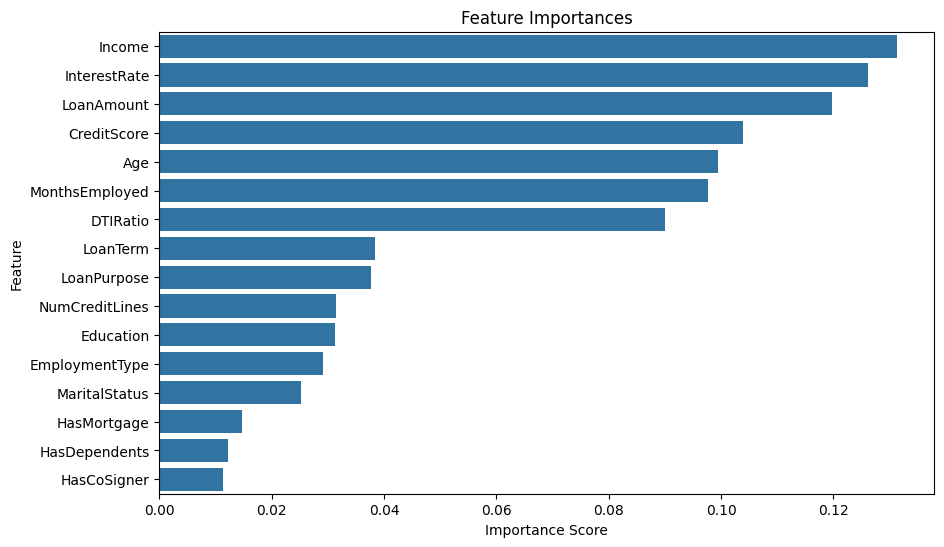

The Accuracy is: 0.89
Confusion Matrix:
 [[44956   183]
 [ 5657   274]]


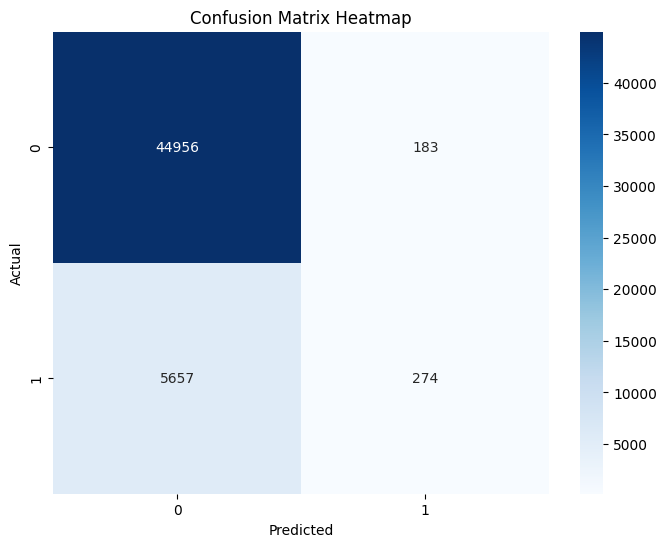

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title("Feature Importances")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()

# Model Predictions
ypred = model.predict(X_test)
accuracy = accuracy_score(y_test, ypred)
print(f"The Accuracy is: {accuracy:.2f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, ypred)
print("Confusion Matrix:\n", conf_matrix)

# Heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix Heatmap")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


# Model Accuracy Boost and Prediction

Accuracy: 0.89
Precision: 0.54
Recall: 0.09
F1 Score: 0.15


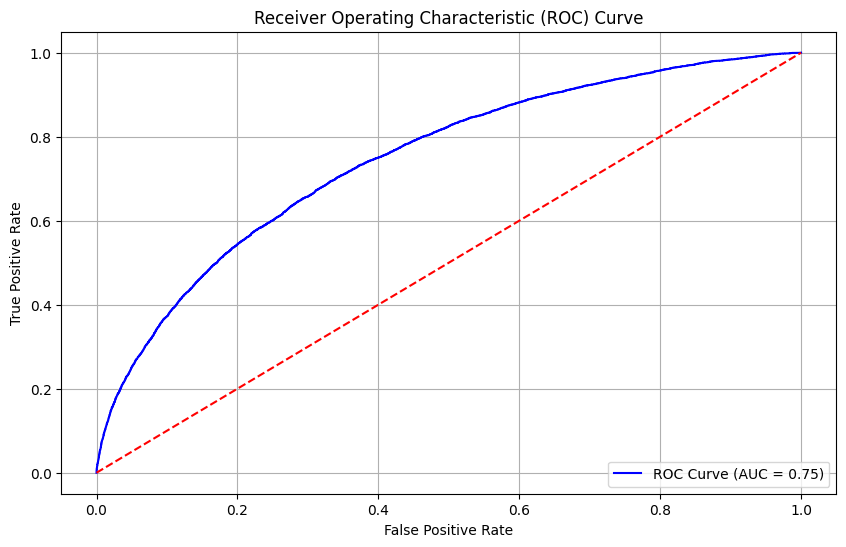

In [ ]:
# Import necessary libraries
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
import matplotlib.pyplot as plt
from xgboost import XGBClassifier  # Import XGBClassifier
from sklearn.model_selection import train_test_split # Import train_test_split

# Assuming you have X and y (your features and target variable) defined
# ...

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Create and train the XGBoost model
model = XGBClassifier(random_state=42, n_jobs=-1)  # Instantiate the model
model.fit(X_train, y_train)  # Fit the model to your training data

# Model Predictions
ypred = model.predict(X_test)

# Calculate accuracy, precision, recall, and F1 score
accuracy = accuracy_score(y_test, ypred)
precision = precision_score(y_test, ypred)
recall = recall_score(y_test, ypred)
f1 = f1_score(y_test, ypred)

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

# ROC Curve
# Get the predicted probabilities for the positive class
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Compute AUC (Area Under Curve)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line (random classifier)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


In [ ]:
!pip uninstall -y xgboost
!pip install xgboost


Found existing installation: xgboost 2.1.2
Uninstalling xgboost-2.1.2:
  Successfully uninstalled xgboost-2.1.2
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.9/153.9 MB 7.6 MB/s eta 0:00:00


# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

# Train the Logistic Regression model
logreg_model = LogisticRegression(random_state=42)
logreg_model.fit(X_train, y_train)

# Model Predictions
ypred_logreg = logreg_model.predict(X_test)

# Calculate accuracy
accuracy_logreg = accuracy_score(y_test, ypred_logreg)
print(f"Logistic Regression Accuracy: {accuracy_logreg:.2f}")

# Confusion Matrix
conf_matrix_logreg = confusion_matrix(y_test, ypred_logreg)
print("Confusion Matrix (Logistic Regression):\n", conf_matrix_logreg)

# Calculate precision, recall, and F1 score
precision_logreg = precision_score(y_test, ypred_logreg)
recall_logreg = recall_score(y_test, ypred_logreg)
f1_logreg = f1_score(y_test, ypred_logreg)

# Print precision, recall, and F1 score
print(f"Precision (Logistic Regression): {precision_logreg:.2f}")
print(f"Recall (Logistic Regression): {recall_logreg:.2f}")
print(f"F1 Score (Logistic Regression): {f1_logreg:.2f}")


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy: 0.88
Confusion Matrix (Logistic Regression):
 [[45091    48]
 [ 5873    58]]
Precision (Logistic Regression): 0.55
Recall (Logistic Regression): 0.01
F1 Score (Logistic Regression): 0.02


# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

# Train the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Model Predictions
ypred_dt = dt_model.predict(X_test)

# Calculate accuracy
accuracy_dt = accuracy_score(y_test, ypred_dt)
print(f"Decision Tree Accuracy: {accuracy_dt:.2f}")

# Confusion Matrix
conf_matrix_dt = confusion_matrix(y_test, ypred_dt)
print("Confusion Matrix (Decision Tree):\n", conf_matrix_dt)

# Calculate precision, recall, and F1 score
precision_dt = precision_score(y_test, ypred_dt)
recall_dt = recall_score(y_test, ypred_dt)
f1_dt = f1_score(y_test, ypred_dt)

# Print precision, recall, and F1 score
print(f"Precision (Decision Tree): {precision_dt:.2f}")
print(f"Recall (Decision Tree): {recall_dt:.2f}")
print(f"F1 Score (Decision Tree): {f1_dt:.2f}")


Decision Tree Accuracy: 0.80
Confusion Matrix (Decision Tree):
 [[39669  5470]
 [ 4570  1361]]
Precision (Decision Tree): 0.20
Recall (Decision Tree): 0.23
F1 Score (Decision Tree): 0.21


# KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

# Train the KNN model
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

# Model Predictions
ypred_knn = knn_model.predict(X_test)

# Calculate accuracy
accuracy_knn = accuracy_score(y_test, ypred_knn)
print(f"KNN Accuracy: {accuracy_knn:.2f}")

# Confusion Matrix
conf_matrix_knn = confusion_matrix(y_test, ypred_knn)
print("Confusion Matrix (KNN):\n", conf_matrix_knn)

# Calculate precision, recall, and F1 score
precision_knn = precision_score(y_test, ypred_knn)
recall_knn = recall_score(y_test, ypred_knn)
f1_knn = f1_score(y_test, ypred_knn)

# Print precision, recall, and F1 score
print(f"Precision (KNN): {precision_knn:.2f}")
print(f"Recall (KNN): {recall_knn:.2f}")
print(f"F1 Score (KNN): {f1_knn:.2f}")


KNN Accuracy: 0.87
Confusion Matrix (KNN):
 [[44321   818]
 [ 5676   255]]
Precision (KNN): 0.24
Recall (KNN): 0.04
F1 Score (KNN): 0.07


# Comparision among 4 Models

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Train the Logistic Regression model
logreg_model = LogisticRegression(random_state=42)
logreg_model.fit(X_train, y_train)
accuracy_logreg = accuracy_score(y_test, logreg_model.predict(X_test))
print(f"Logistic Regression Accuracy: {accuracy_logreg:.2f}")

# Train the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
accuracy_dt = accuracy_score(y_test, dt_model.predict(X_test))
print(f"Decision Tree Accuracy: {accuracy_dt:.2f}")

# Train the KNN model
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
accuracy_knn = accuracy_score(y_test, knn_model.predict(X_test))
print(f"KNN Accuracy: {accuracy_knn:.2f}")

# Train the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
accuracy_rf = accuracy_score(y_test, rf_model.predict(X_test))
print(f"Random Forest Accuracy: {accuracy_rf:.2f}")

# Find the best model based on accuracy
model_accuracies = {
    'Logistic Regression': accuracy_logreg,
    'Decision Tree': accuracy_dt,
    'K-Nearest Neighbors (KNN)': accuracy_knn,
    'Random Forest': accuracy_rf
}
best_model_name = max(model_accuracies, key=model_accuracies.get)

# Output the best model
print(f"\nBest Model based on Accuracy: {best_model_name}")
print(f"Accuracy: {model_accuracies[best_model_name]:.2f}")


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy: 0.88
Decision Tree Accuracy: 0.80
KNN Accuracy: 0.87
Random Forest Accuracy: 0.89

Best Model based on Accuracy: Random Forest
Accuracy: 0.89


In [ ]:
import numpy as np
import json

# Assuming you have your trained KNN model in the 'knn_model' variable

# Define the JSON input directly within your code
user_input_json = {
    "Age": 25,
    "Income": 10000,
    "LoanAmount": 200000,
    "CreditScore": 0,
    "MonthsEmployed": 60,
    "NumCreditLines": 2,
    "InterestRate": 3.5,
    "LoanTerm": 36,
    "DTIRatio": 0.35,
    "Education": 1,          # Example: 1 = Graduate, 0 = Non-graduate
    "EmploymentType": 2,     # Example: 2 = Salaried, 1 = Self-employed, 0 = Unemployed
    "MaritalStatus": 1,      # Example: 1 = Married, 0 = Single
    "HasMortgage": 0,        # Example: 0 = No, 1 = Yes
    "HasDependents": 1,
    "LoanPurpose":2,
    "HasCoSigner" : 1# Example: 0 = No, 1 = Yes
}


# Extract feature values from JSON and convert to numpy array
features = [
    "Age", "Income", "LoanAmount", "CreditScore", "MonthsEmployed","NumCreditLines",
    "InterestRate", "LoanTerm", "DTIRatio", "Education",
    "EmploymentType", "MaritalStatus", "HasMortgage", "HasDependents","LoanPurpose","HasCoSigner"
]
user_input = np.array([user_input_json[feature] for feature in features]).reshape(1, -1)

# Predict using the model
prediction = rf_model.predict(user_input)

# Display results
print("\nLoan Prediction:")
if prediction[0] == 0:
    print("The loan is predicted to be approved.")
else:
    print("The loan is predicted to be disapproved.")


Loan Prediction:
The loan is predicted to be approved.


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
import numpy as np
import json


# Define the JSON input directly within your code
user_input_json = {
    "Age": 40,
    "Income": 10000,
    "LoanAmount": 200000,
    "CreditScore": 500,
    "MonthsEmployed": 32,
    "NumCreditLines": 2,
    "InterestRate": 3.5,
    "LoanTerm": 36,
    "DTIRatio": 0.35,
    "Education": 1,          # Example: 1 = Graduate, 0 = Non-graduate
    "EmploymentType": 2,     # Example: 2 = Salaried, 1 = Self-employed, 0 = Unemployed
    "MaritalStatus": 1,      # Example: 1 = Married, 0 = Single
    "HasMortgage": 0,        # Example: 0 = No, 1 = Yes
    "HasDependents": 1,
    "LoanPurpose":2,
    "HasCoSigner" : 1# Example: 0 = No, 1 = Yes
}


# Extract feature values from JSON and convert to numpy array
features = [
    "Age", "Income", "LoanAmount", "CreditScore", "MonthsEmployed","NumCreditLines",
    "InterestRate", "LoanTerm", "DTIRatio", "Education",
    "EmploymentType", "MaritalStatus", "HasMortgage", "HasDependents","LoanPurpose","HasCoSigner"
]
user_input = np.array([user_input_json[feature] for feature in features]).reshape(1, -1)

# Predict using the model
prediction = rf_model.predict(user_input)

# Display results
print("\nLoan Prediction:")
if prediction[0] == 0:
    print("The loan is predicted to be approved.")
else:
    print("The loan is predicted to be disapproved.")


Loan Prediction:
The loan is predicted to be approved.


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
